In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import matplotlib as mpl
mb = (0, 0.4470, 0.7410)
mr = (0.8500, 0.3250, 0.0980)
lmr = (0.9500, 0.7250, 0.5980)
lmb = (0.5, 0.7470, 0.8710)
# Set the font family to Times New Roman

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.weight'] = 'normal'



path = r'C:\Users\raklab\Pictures\Feedback_Data\20240710'
filename = 'run3.avi'

file_path = os.path.join(path, filename)

# Load the video
cap = cv2.VideoCapture(file_path)

# Get the number of frames in the video
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the width and height of the frames in the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create an empty numpy array to store the video frames
video_frames = np.zeros((frame_count, frame_height), np.dtype('float'))

print(frame_width, frame_height, frame_count)
      
      
t0 = time.time()

# Read the frames from the video and store them in the numpy array
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:

        break
    sframe = np.sum(frame,axis=2)
    comp = np.min(sframe, axis=1)

    video_frames[i] = comp
    i += 1
    
    if i % 1000 == 0:
        print(f"Progress: {i}/{frame_count}")

    
    
# code_block
t1 = time.time()

total = t1-t0
print(total," sec")
cap.release()

224 844 24568
Progress: 1000/24568
Progress: 2000/24568
Progress: 3000/24568
Progress: 4000/24568
Progress: 5000/24568
Progress: 6000/24568
Progress: 7000/24568
Progress: 8000/24568
Progress: 9000/24568
Progress: 10000/24568
Progress: 11000/24568
Progress: 12000/24568
Progress: 13000/24568
Progress: 14000/24568
Progress: 15000/24568
Progress: 16000/24568
Progress: 17000/24568
Progress: 18000/24568
Progress: 19000/24568
Progress: 20000/24568
Progress: 21000/24568
Progress: 22000/24568
Progress: 23000/24568
Progress: 24000/24568
102.58376455307007  sec


In [146]:
np.savez('control_data.npz', res = video_frames)

[[129. 135. 129. ... 222. 240. 231.]
 [117. 126. 117. ... 222. 234. 228.]
 [108. 105.  96. ... 216. 207. 222.]
 ...
 [111. 141. 135. ... 219. 228. 225.]
 [117. 120. 114. ... 228. 225. 231.]
 [132. 135. 138. ... 231. 228. 228.]]


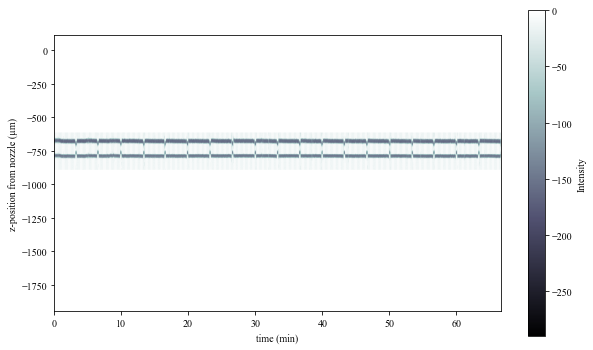

In [149]:
# res = np.copy(video_frames)
res = np.load('control_data.npz')['res']
print(res)
plt.figure(figsize=(10, 6))  # Example: 10 inches wide, 6 inches tall

res[res>250] = 290
res[:,0:300] = 290
res[:,-430:] = 290
res = res - np.median(res,axis=1, keepdims=True)
numberOfPixels = 260
Length = 25400/4/10
fps = 6.15
extent = np.array([0, frame_count/fps/60, -1950, res.shape[1]*Length/numberOfPixels-1950])
plt.rcParams['figure.figsize'] = [5, 4]  # [width, height] in inches
plt.imshow(res.T,aspect=.02,cmap='bone',extent=extent)
plt.ylabel('z-position from nozzle (µm)')
plt.xlabel('time (min)')
#plt.savefig('Results/waterfall.pdf', format='pdf', dpi=300)
#plt.savefig('Results/waterfall.png', dpi=300)
plt.colorbar(label='Intensity')  # Add colorbar with label
plt.show()

In [121]:
# res[:,0:50] = res[:,50:100]
autocorr = np.zeros(res.shape[0], dtype=float)
med = np.median(res)
def find_max_parabolic(data):
    # Find the index of the maximum value
    max_index = np.argmax(data)
    vals = data[max_index+np.arange(-1,2)]
    slope = (vals[2]-vals[0])/2
    curve = vals[2]-2*vals[1]+vals[0]
    x= -(slope/(2*curve))
    return max_index+x
for i in range(res.shape[0]):
    corrfunc = np.correlate(res[0, :]-med, res[i, :]-med, mode='full')
    autocorr[i] = find_max_parabolic(corrfunc)
    if i%10000==0:
        print(i)

0


<ipython-input-121-922358c174c1>:10: RuntimeWarning: invalid value encountered in double_scalars
  x= -(slope/(2*curve))


10000
20000


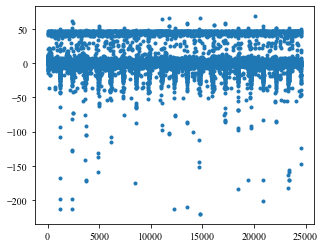

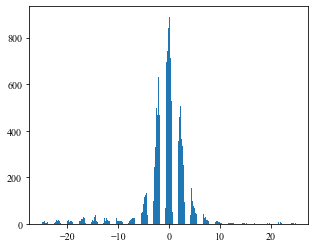

In [139]:
position = (autocorr-frame_height)*Length/numberOfPixels
plt.plot(position,'.')
plt.show()
plt.hist(position, bins = np.arange(-25,25,.1))
plt.show()

In [131]:
print(11*Length/numberOfPixels)

26.865384615384617


Text(0.5, 0, 'time (s)')

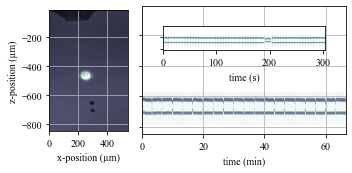

In [145]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [5, 3]  # [width, height] in inches

fig = plt.figure()
gs = GridSpec(1, 10)

# Define the subplots' positions
ax1 = fig.add_subplot(gs[0, :3])  # First subplot, takes 1/3rd of space
ax2 = fig.add_subplot(gs[0, 3:])  # Second subplot, takes 2/3rd of space

extent = np.array([0, sframe[:(300+144),:].shape[1]*Length/numberOfPixels, -1150+300, sframe[:(200+144),:].shape[0]*Length/numberOfPixels-1150+300])
ax1.imshow(sframe[:(300+144),:],cmap='bone',extent=extent)
ax1.set_xlabel('x-position (µm)')
ax1.set_ylabel('z-position (µm)')
ax1.xaxis.set_major_locator(plt.MaxNLocator(nbins=3))
ax1.grid(True)
ax1.grid(True, which='minor', linestyle='--', linewidth=0.5)


extent = np.array([0, frame_count/fps/60, -1150+300, res[:,:(200+144)].shape[1]*Length/numberOfPixels-1150+300])
#axs[1].imshow(res[(161107-1000):161107,:].T,aspect=.05,cmap='bone',extent=extent)
ax2.imshow(res[:,:(300+144)].T,aspect=3/60,cmap='bone',extent=extent)
ax2.set_xlabel('time (min)')
ax2.set_yticklabels([])
ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins=4))
ax2.grid(True)
fig.tight_layout()  # Adjust the layout of the plot

# Add an inset plot on ax2
inset_ax = ax2.inset_axes([0.1, 0.6, 0.8, 0.3])#[height="30%", width="80%", loc='upper center'])

extent = np.array([0, 1872/fps, -1150, res.shape[1]*Length/numberOfPixels-1150])
inset_ax.imshow(res[:1872,200:(300+144)].T, aspect=0.018,cmap='bone',extent=extent)  # Example data for the inset plot
inset_ax.set_yticklabels([])
inset_ax.set_xlabel('time (s)')
#fig.savefig('Results/droplet_waterfall.pdf', format='pdf', dpi=300)
#plt.savefig('Results/droplet_waterfall.png', dpi=300)